# 1. Linear Regression

线性模型是最简单，最基础的机器学习模型之一。许多功能强大的nonlinear model可在线性模型的基础上通过引入层级结构或高维映射得到。

线性回归的公式是：给定
$$

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [21]:
def initialize_params(dims):
    ''' 
    初始化线性回归模型参数 w,b
    @params: 
        dims: 训练数据特征维度
    @return:
        w: 初始化的weights
        b: 初始化的bias
    '''
    w = np.zeros((dims, 1))     # 初始化weight为0矩阵
    b = 0                       # 初始化bias为0
    return w,b

def linear_loss(X, y, w, b):
    ''' 
    线性回归模型主体, 包括loss function和参数偏导

    Args:
        X: 输入数据n*d，矩阵形式 n为样本数量，d为特征数
        y: 表示label
        w: 权重向量
        b: 偏差项
    Returns:
        y_hat: 模型预测输出
        loss: 损失值
        dw: 权重参数一阶导
        db: 偏差项一阶偏导
    '''
    # 训练样本数量n，特征数量d
    num_train, num_feature = X.shape
    # 1. 当前参数的回归预测值
    y_hat = np.dot(X,w) + b
    # 2. 计算损失函数MSE
    loss = np.sum((y_hat-y)**2)/num_train
    # 3. 计算dw，db
    # dw = 2*X^T*(Xw+b-y)/n, db = 2*(Xw+b-y)/n 我们可以省略2
    dw = np.dot(X.T, (y_hat-y))/num_train
    db = np.sum((y_hat-y))/num_train
    return y_hat, loss, dw, db

def fit(X, y, learning_rate=0.01, epochs=10000, verbose=True):
    '''
    该方法用于训练

    Args:
        X: 输入的变量矩阵
        y: label
        learning_rate: 学习率
        epochs: 迭代次数

    Returns:
        loss_his: 记录每次迭代的MSE
        params: 优化后的参数
        grads: 优化后的参数梯度
    '''
    # 记录loss的list
    loss_his = []
    # 1. 初始化model参数
    w,b = initialize_params(X.shape[1])
    # 2. 迭代训练开始
    for i in range(1, epochs):
        # 2.1 计算当前迭代的值，用刚才定义的方法
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 2.2 基于GD的参数更新
        w += -learning_rate * dw
        b += -learning_rate * db
        # 2.3 记录当前损失
        loss_his.append(loss)
        
        if i%1000 == 0 and verbose:
            print(f'epoch {i} loss {loss}')

        # 保存参数和梯度参数信息
        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}
    return loss_his, params, grads
    
def predict(X, params):
    ''' 
    根据训练得到的参数对测试集预测
    
    Args:
        X: 测试数据集
        params: 训练得到的参数
    Return:
        y_pred = 模型预测结果
    '''
    w,b = params.values()
    y_pred = np.dot(X,w) + b
    return y_pred
    

In [29]:
from sklearn.datasets import load_diabetes
# 导入diabetes库
diabetes = load_diabetes()
data, target = diabetes.data, diabetes.target
print(data.shape, target.shape)
# 划分train，test
offset = int(data.shape[0] * 0.8)
X_train, y_train = data[:offset], target[:offset]
X_test, y_test = data[offset:], target[offset:]
# 把y转换成1维向量，第一个-1表示自动计算维度，即行数，第二个1表示变成一列
y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))



(442, 10) (442,)


In [30]:
loss_his, params, grads = fit(X_train, y_train, epochs=30000)

epoch 1000 loss 5452.993532673206
epoch 2000 loss 5154.066084534963
epoch 3000 loss 4899.543906136052
epoch 4000 loss 4682.210914226041
epoch 5000 loss 4496.054548490867
epoch 6000 loss 4336.063566922767
epoch 7000 loss 4198.059912215101
epoch 8000 loss 4078.5588747988204
epoch 9000 loss 3974.652787084891
epoch 10000 loss 3883.914286182583
epoch 11000 loss 3804.3158498504436
epoch 12000 loss 3734.1628654835226
epoch 13000 loss 3672.037953488208
epoch 14000 loss 3616.7546501956663
epoch 15000 loss 3567.318874613109
epoch 16000 loss 3522.8968687003107
epoch 17000 loss 3482.7885215427104
epoch 18000 loss 3446.4051713030476
epoch 19000 loss 3413.251131432639
epoch 20000 loss 3382.9083145183417
epoch 21000 loss 3355.023432661854
epoch 22000 loss 3329.297341034975
epoch 23000 loss 3305.4761642216276
epoch 24000 loss 3283.343905634623
epoch 25000 loss 3262.716290752529
epoch 26000 loss 3243.4356368811345
epoch 27000 loss 3225.3665770362686
epoch 28000 loss 3208.3924945607496
epoch 29000 loss 

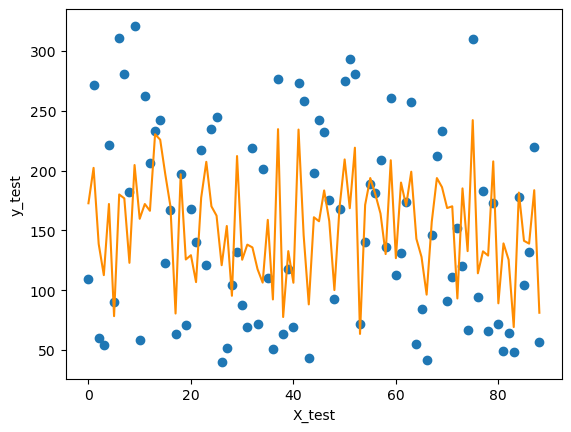

In [31]:
y_pred = predict(X_test, params)
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

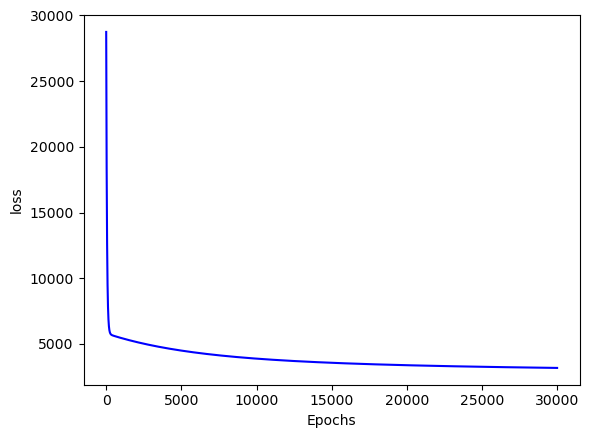

In [32]:
plt.plot(loss_his, color='blue')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [39]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 10.981301548498738


# LASSO回归（L1正则项）& Ridge回归（L2正则项）


In [44]:
data = np.genfromtxt('example.dat', delimiter=',')
print(f'Data\'s shape: {data.shape}')
X = data[:, :100]
y = data[:, 100].reshape(-1,1 ) # 用numpy取一列时，得到的是降维后的1维数组,所以我们需要补充维度
X = np.column_stack((np.ones((X.shape[0], 1)), x))
print(f'X\'s shape: {X.shape} \ny\'s shape: {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

Data's shape: (101, 101)
X's shape: (101, 101) 
y's shape: (101, 1)


In [76]:
def sign(X):
    ''' 
    定义sign函数, 如果输入>0 -> 1; <0 -> -1; ==0 -> 0
    '''
    if X>0:
        return 1
    elif X<0:
        return -1
    else:
        return 0

# 使以标量输入的函数转换为接受数组输入的函数
vec_sign = np.vectorize(sign)

def l1_loss(X, y, w, b, alpha):
    ''' 
    包含l1正则项的损失函数
    '''
    num_train, num_feature = X.shape
    y_hat = np.dot(X,w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*np.sum(abs(w))
    dw = np.dot(X.T, (y_hat-y))/num_train + alpha*vec_sign(w)
    db = np.sum((y_hat-y))/num_train
    return y_hat, loss, dw, db

def l2_loss(X, y, w, b, alpha):
    ''' 
    包含l1正则项的损失函数
    '''
    num_train, num_feature = X.shape
    y_hat = np.dot(X,w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*np.sum(np.square(w))
    dw = np.dot(X.T, (y_hat-y))/num_train + 2*alpha*w
    db = np.sum((y_hat-y))/num_train
    return y_hat, loss, dw, db

def fit_regularization(X, y, learning_rate=0.01, epochs=300, method='l2',verbose=True):
    ''' 
    Lasso回归
    '''
    loss_list = []
    w,b = initialize_params(X.shape[1])
    for i in range(epochs):
        if method == 'l1':
            y_hat, loss, dw, db = l1_loss(X,y,w,b,0.1)
        else:
            y_hat, loss, dw, db = l2_loss(X,y,w,b,0.1)
        w += -learning_rate*dw
        b += -learning_rate*db
        loss_list.append(loss)

        if verbose and i%300 == 0 and i!=0:
            print(f"Epoch {i} loss {loss}")
        params = {'w':w, 'b':b}
        grads = {'dw':dw, 'db':db}

    return loss, loss_list, params, grads

In [79]:
loss, loss_his, params, grads = fit_regularization(X_train, y_train, 0.01, 3000, method='l1')
from sklearn.metrics import r2_score
y_pred = predict(X_test, params)
print(f'Lasso r2: {r2_score(y_test, y_pred)}')
loss_l2, loss_his_l2, params_l2, grads_l2 = fit_regularization(X_train, y_train, 0.01, 3000, method='l2')
y_pred_l2 = predict(X_test, params)
print(f'Ridge r2: {r2_score(y_test, y_pred_l2)}')



Epoch 300 loss 1.7883322428937984
Epoch 600 loss 1.6300426916284505
Epoch 900 loss 1.5658245693481287
Epoch 1200 loss 1.5380003086015597
Epoch 1500 loss 1.5260121390219483
Epoch 1800 loss 1.5199890417812063
Epoch 2100 loss 1.5170051919425058
Epoch 2400 loss 1.5160740971853566
Epoch 2700 loss 1.5151132587739835
Lasso r2: 0.7803075088409601
Epoch 300 loss 0.8483806708243963
Epoch 600 loss 0.7761030519428067
Epoch 900 loss 0.7605547745139626
Epoch 1200 loss 0.7553993671760637
Epoch 1500 loss 0.753257028519549
Epoch 1800 loss 0.7522091451599509
Epoch 2100 loss 0.7516264423640238
Epoch 2400 loss 0.751268789570838
Epoch 2700 loss 0.7510327949385605
Ridge r2: 0.7803075088409601


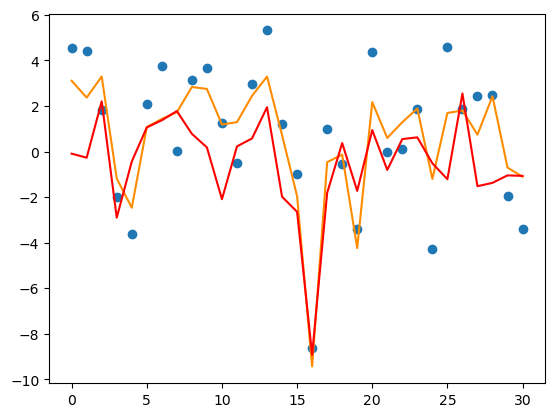

In [80]:
f = X_test.dot(params['w']) + params['b']
f2 = X_test.dot(params_l2['w']) + params_l2['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f,color = 'darkorange')
plt.plot(f2, color = 'red')


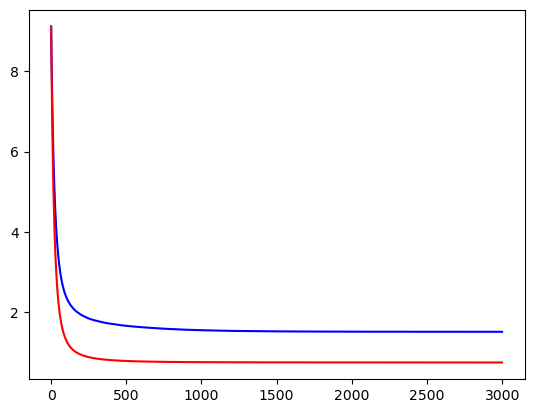

In [82]:
plt.plot(loss_his, color='blue')
plt.plot(loss_his_l2, color = 'red')
plt.show()

In [86]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)

0.7802995942467058

In [89]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_rg = ridge.predict(X_test)
r2_score(y_test, y_pred_rg)

-0.06923159111741306